<a href="https://colab.research.google.com/github/WeilongYE/unet-for-cityscapes-road-segmentation/blob/main/cityscapes_datasets_preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cityscapes Datasets Preparation

## Table of Contents
- 0 Introduction
- 1 Setup Kaggle API Key in Colab
- 2 Prepare RGB Images
  - 2.1 Download Datasets
  - 2.2 Inspect RGB Images
  - 2.3 Reorgnize RGB Images
- 3 Prepare Fine Annotations
  - 3.1 Download Datasets
  - 3.2 Inspect Label Images
  - 3.3 Reorgnize Label Images
  - 3.4 Check Relative RGB and Label Images
- 4 Zip Reorgnized and Resized Datasets


## 0 Introduction
The [Cityscapes Dataset](https://www.cityscapes-dataset.com/dataset-overview/) is dedicated to the semantic analysis of urban street scenes. This version is a preprocessed subsample that has 2975 training images and 500 validation images with there relative fine annotation images. The datasets is saved in Kaggle [dataset](https://www.kaggle.com/datasets/weilongye/cityscapes-leftimg-and-fineannotations-preprocessed).

## 1 Setup Kaggle API Key in Colab

In [1]:
# Step 1: Get the Kaggle API Key. https://www.kaggle.com/docs/api#authentication
# - Go to Kaggle and log in.
# - Click on your profile picture (top right), then select Settings.
# - Scroll down to the API section and click Create New API Token.
# - A file named kaggle.json will be downloaded.
from google.colab import files
files.upload()  # This will prompt you to upload the kaggle.json file

# Step 2: Move kaggle key to proper location
import os
import shutil
os.makedirs("/root/.kaggle", exist_ok=True)
shutil.move("kaggle.json", "/root/.kaggle/kaggle.json")
os.chmod("/root/.kaggle/kaggle.json", 600)

Saving kaggle.json to kaggle.json


## 2 Prepare RGB Images
### 2.1 Download Datasets
Kaggle datasets link: https://www.kaggle.com/datasets/chrisviviers/cityscapes-leftimg8bit-trainvaltest

In [2]:
# Downlad datasets from Kaggle
import kagglehub
path = kagglehub.dataset_download("chrisviviers/cityscapes-leftimg8bit-trainvaltest")
print("Path to dataset files:", path)

downloaded_rgb_dir = "downloaded_datasets/rgb"
shutil.rmtree(downloaded_rgb_dir, ignore_errors=True)
os.makedirs(downloaded_rgb_dir, exist_ok=True)
shutil.move(path, downloaded_rgb_dir)

100%|██████████| 10.8G/10.8G [02:25<00:00, 79.5MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/chrisviviers/cityscapes-leftimg8bit-trainvaltest/versions/1


'downloaded_datasets/rgb/1'

### 2.2 Inspect RGB Images

2975
500
(1024, 2048, 3)
(1024, 2048, 3)


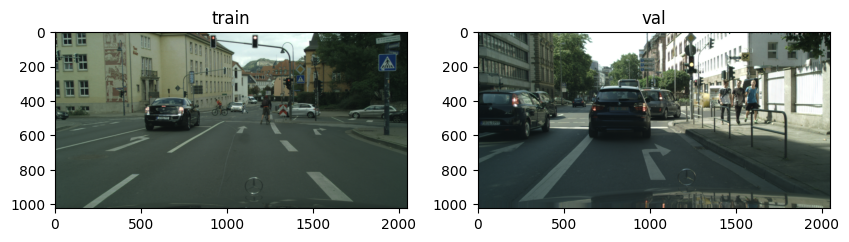

In [3]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

def get_all_files(dir_name):
  file_paths = []
  for root, dirs, files in os.walk(dir_name):
    for file in files:
      file_paths.append(os.path.join(root, file))
  return file_paths

all_files = get_all_files("downloaded_datasets/rgb/1")

downloaded_train_rgb_files = [file for file in all_files if "leftImg8bit" in file and "train" in file]
downloaded_val_rgb_files = [file for file in all_files if "leftImg8bit" in file and "val" in file]
print(len(downloaded_train_rgb_files))
print(len(downloaded_val_rgb_files))

train_rgb_img = np.array(Image.open(downloaded_train_rgb_files[0]))
val_rgb_img = np.array(Image.open(downloaded_val_rgb_files[0]))
print(train_rgb_img.shape)
print(val_rgb_img.shape)
fig, axis = plt.subplots(1, 2, figsize=(10, 5))
axis[0].set_title("train")
axis[0].imshow(train_rgb_img)
axis[1].set_title("val")
axis[1].imshow(val_rgb_img)
plt.show()

### 2.3 Reorgnize and Resize RGB Images
The directory structure will be:
- cityscapes_data/train/rgb/*filename*.png
- cityscapes_data/val/rgb/*filename*.png

The resolution will be:
- 256 * 256

In [4]:
train_rgb_dir = os.path.join("cityscapes_data/train/rgb")
val_rgb_dir = os.path.join("cityscapes_data/val/rgb")
shutil.rmtree(train_rgb_dir, ignore_errors=True)
shutil.rmtree(val_rgb_dir, ignore_errors=True)
os.makedirs(train_rgb_dir, exist_ok=True)
os.makedirs(val_rgb_dir, exist_ok=True)

save_shape = (256, 256)

for file in downloaded_train_rgb_files:
  # open, resize and save image
  image = Image.open(file).resize(save_shape, Image.NEAREST)
  dst_filename = os.path.basename(file.replace("_leftImg8bit", ""))
  image.save(os.path.join(train_rgb_dir, dst_filename))

for file in downloaded_val_rgb_files:
  image = Image.open(file).resize(save_shape, Image.NEAREST)
  dst_filename = os.path.basename(file.replace("_leftImg8bit", ""))
  image.save(os.path.join(val_rgb_dir, dst_filename))

2975
500


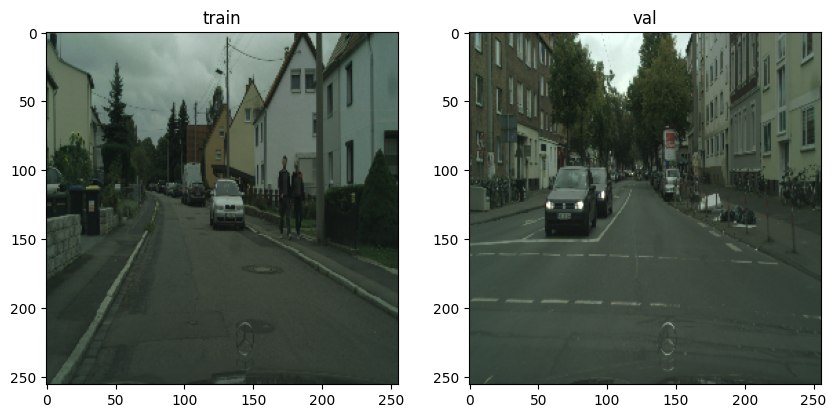

In [5]:
# Check reorgnized rgb files
train_rgb_files = os.listdir(train_rgb_dir)
val_rgb_files = os.listdir(val_rgb_dir)
print(len(train_rgb_files))
print(len(val_rgb_files))

fig, axis = plt.subplots(1, 2, figsize=(10, 5))
axis[0].set_title("train")
axis[0].imshow(Image.open(os.path.join(train_rgb_dir, train_rgb_files[0])))
axis[1].set_title("val")
axis[1].imshow(Image.open(os.path.join(val_rgb_dir, val_rgb_files[0])))
plt.show()

## 3 Prepare Fine Annotations
### 3.1 Download Datasets
Kaggle datasets link: https://www.kaggle.com/datasets/devmaxime/cityscapes-fine-annotations

In [10]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("devmaxime/cityscapes-fine-annotations")
print("Path to dataset files:", path)
downloaded_label_dir = "downloaded_datasets/label"
shutil.rmtree(downloaded_label_dir, ignore_errors=True)
os.makedirs(downloaded_label_dir, exist_ok=True)
shutil.move(path, downloaded_label_dir)

100%|██████████| 240M/240M [00:01<00:00, 155MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/devmaxime/cityscapes-fine-annotations/versions/1


'downloaded_datasets/label/1'

### 3.2 Inspect Label Images

2975
500
(1024, 2048)
(1024, 2048)


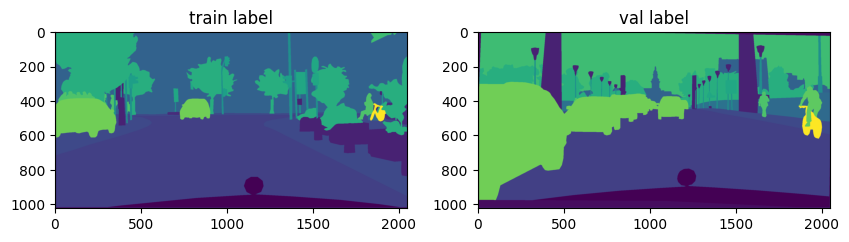

In [12]:
all_files = get_all_files("downloaded_datasets/label/1")
downloaded_train_labelIds_files = [file for file in all_files if "gtFine_labelIds" in file and "train" in file]
downloaded_val_labelIds_files = [file for file in all_files if "gtFine_labelIds" in file and "val" in file]
print(len(downloaded_train_labelIds_files))
print(len(downloaded_val_labelIds_files))

train_labelIds_img = np.array(Image.open(downloaded_train_labelIds_files[0]))
val_labelIds_img = np.array(Image.open(downloaded_val_labelIds_files[0]))
print(train_labelIds_img.shape)
print(val_labelIds_img.shape)

fig, axis = plt.subplots(1, 2, figsize=(10, 5))
axis[0].set_title("train label")
axis[0].imshow(train_labelIds_img)
axis[1].set_title("val label")
axis[1].imshow(val_labelIds_img)
plt.show()

### 3.3 Reorgnize and Resize Label Images
The Directory structure will be:
- cityscapes_data/train/rgb/filename.png
- cityscapes_data/val/rgb/filename.png

The resolution will be:
- 256 * 256

In [13]:
# Create folders
train_label_dir = os.path.join("cityscapes_data/train/label")
val_label_dir = os.path.join("cityscapes_data/val/label")
shutil.rmtree(train_label_dir, ignore_errors=True)
shutil.rmtree(val_label_dir, ignore_errors=True)
os.makedirs(train_label_dir, exist_ok=True)
os.makedirs(val_label_dir, exist_ok=True)

for file in downloaded_train_labelIds_files:
  # Open, resize and save label image
  image = Image.open(file).resize(save_shape, Image.NEAREST)
  dst_filename = os.path.basename(file.replace("_gtFine_labelIds", ""))
  image.save(os.path.join(train_label_dir, dst_filename))

for file in downloaded_val_labelIds_files:
  image = Image.open(file).resize(save_shape, Image.NEAREST)
  dst_filename = os.path.basename(file.replace("_gtFine_labelIds", ""))
  image.save(os.path.join(val_label_dir, dst_filename))

2975
500


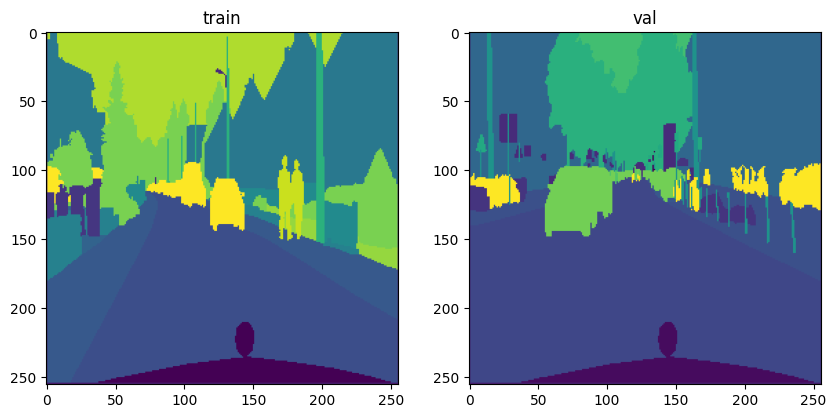

In [15]:
# Check re-orgnized label images
train_label_files = os.listdir(train_label_dir)
val_label_files = os.listdir(val_label_dir)
print(len(train_label_files))
print(len(val_label_files))

fig, axis = plt.subplots(1, 2, figsize=(10, 5))
axis[0].set_title("train")
axis[0].imshow(Image.open(os.path.join(train_label_dir, train_label_files[0])))
axis[1].set_title("val")
axis[1].imshow(Image.open(os.path.join(val_label_dir, val_label_files[0])))
plt.show()

### 3.4 Check Relative RGB and Label Images

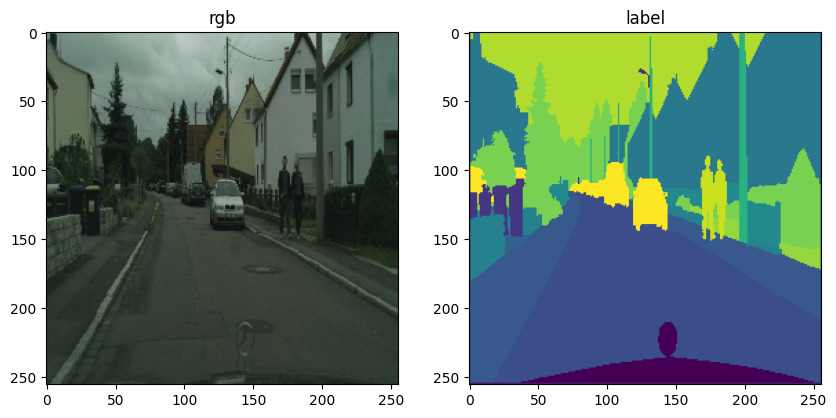

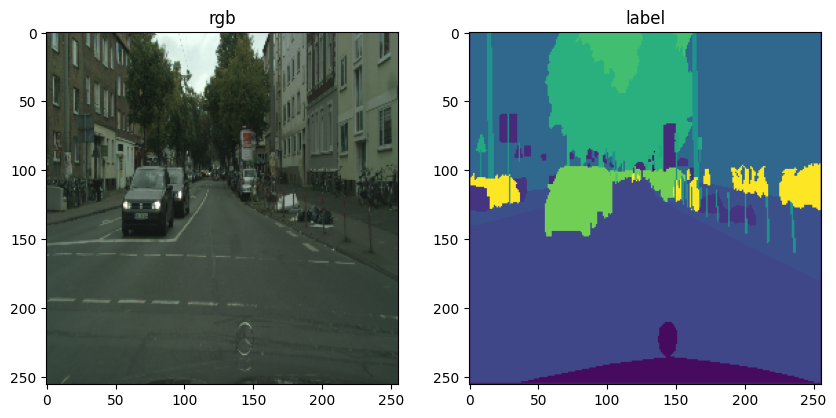

In [16]:
# Check if all filenamess in train/rgb are also in train/label
for file in train_rgb_files:
  if file not in train_label_files:
    print(file)

common_filename = train_rgb_files[0]
fig, axis = plt.subplots(1, 2, figsize=(10, 5))
axis[0].set_title("rgb")
axis[0].imshow(Image.open(os.path.join(train_rgb_dir, common_filename)))
axis[1].set_title("label")
axis[1].imshow(Image.open(os.path.join(train_label_dir, common_filename)))
plt.show()

# Check if all filenamess in val/rgb are also in val/label
for file in val_rgb_files:
  if file not in val_label_files:
    print(file)

common_filename = val_rgb_files[0]
fig, axis = plt.subplots(1, 2, figsize=(10, 5))
axis[0].set_title("rgb")
axis[0].imshow(Image.open(os.path.join(val_rgb_dir, common_filename)))
axis[1].set_title("label")
axis[1].imshow(Image.open(os.path.join(val_label_dir, common_filename)))

## 4 Zip Reorgnized and Resized Datasets

In [17]:
shutil.rmtree("cityscapes_data.zip", ignore_errors=True)
zip_filename = "cityscapes_data.zip"
shutil.make_archive("cityscapes_data", "zip", "cityscapes_data")

'/content/cityscapes_data.zip'